# WINE_DATA

### Step 1: Clean Data

In [2]:
import pandas as pd
import numpy as np

wine_data = pd.read_csv('/Users/santiagowon/Dropbox/Santiago/01. Maestria/Advaced Mathematics and Statistics/Element 1 Assignment/data/wine_data.csv')
wine_data.replace(['', ' ', np.nan, '\u200b'], pd.NA, inplace=True)
numeric_columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 
                   'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 
                   'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

wine_data[numeric_columns] = wine_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
wine_data = wine_data.dropna()

# Drop the 'Unnamed: 0' column
wine_data = wine_data.drop(columns=['Unnamed: 0'])

wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


'proline' serves as the target variable for a regression task, where the goal could be to predict the proline content based on the other features provided in the dataset, such as alcohol content, malic acid, ash, and so on.

### Step2: Check for linearity, independence of errors, homoscedasticity, and normality of errors.

Mean Squared Error: 42923.17111441039


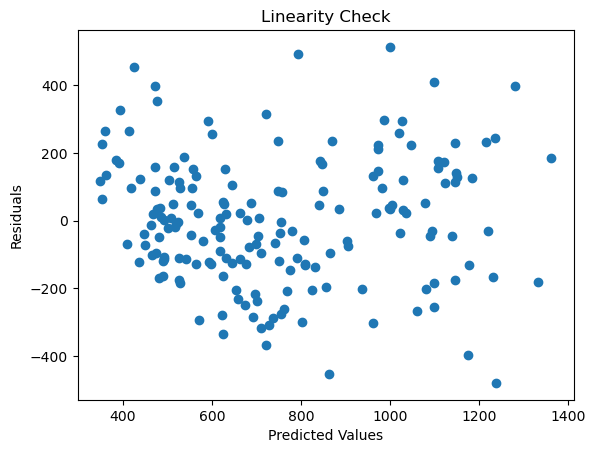

Durbin-Watson Statistic: 1.7593841204095226


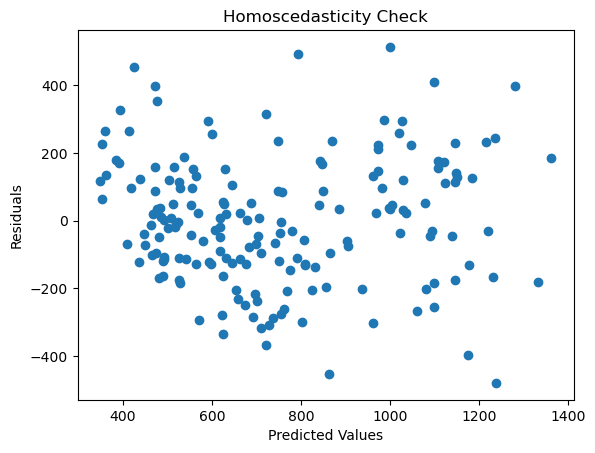

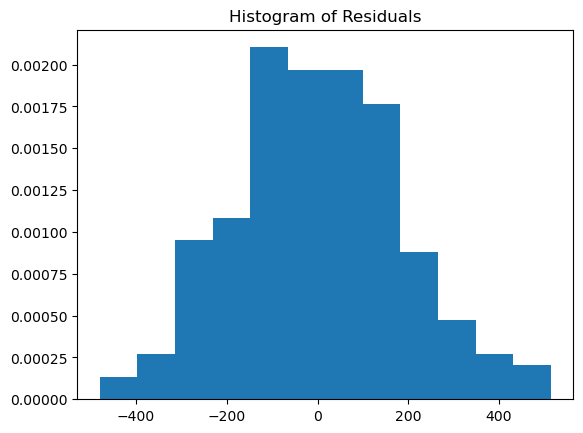

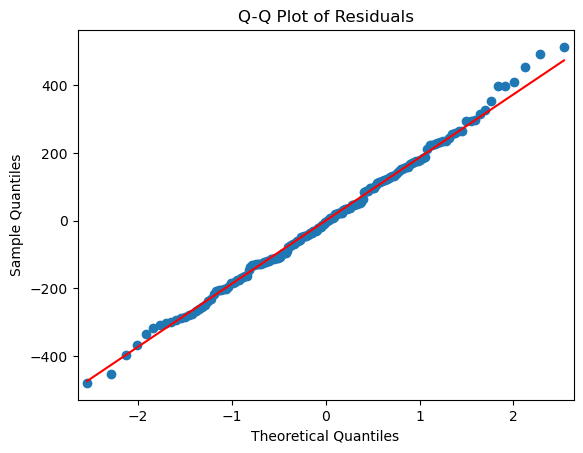

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

X = wine_data[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines']]
y = wine_data['proline']


X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Assuming your model is already fitted and named 'model'
residuals = model.resid

# Linearity: Scatter plot of residuals against predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

# Independence of Errors: Durbin-Watson test
durbin_watson_stat = sm.stats.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')

# Homoscedasticity: Scatter plot of residuals against predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Normality of Errors: Histogram and Q-Q plot
plt.hist(residuals, bins='auto', density=True)
plt.title('Histogram of Residuals')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


Observations:

DW: 1.76 suggests the presence of positive autocorrelation

MSE: suggesting that there is a considerable amount of variability or dispersion in the squared differences between predicted and actual proline values.

Data doesn't seem linear

Data seems to have normal distribution

#### Step 2: Scaling Data

In [4]:
# Create a new DataFrame to store the scaled values
scaled_wine_data = wine_data.copy()

# Scale column by multiplying and dividing
scaling_factor = 1/100 
scaled_wine_data['proline'] = scaled_wine_data['proline'] * scaling_factor
scaled_wine_data['magnesium'] = scaled_wine_data['magnesium'] * scaling_factor

scaling_factor2 = 1/10 
scaled_wine_data['alcalinity_of_ash'] = scaled_wine_data['alcalinity_of_ash'] * scaling_factor2
scaled_wine_data['alcohol'] = scaled_wine_data['alcohol'] * scaling_factor2


print("\nScaled DataFrame:")
scaled_wine_data


Scaled DataFrame:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.423,1.71,2.43,1.56,1.27,2.80,3.06,0.28,2.29,5.64,1.04,3.92,10.65
1,1.320,1.78,2.14,1.12,1.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,10.50
2,1.316,2.36,2.67,1.86,1.01,2.80,3.24,0.30,2.81,5.68,1.03,3.17,11.85
3,1.437,1.95,2.50,1.68,1.13,3.85,3.49,0.24,2.18,7.80,0.86,3.45,14.80
4,1.324,2.59,2.87,2.10,1.18,2.80,2.69,0.39,1.82,4.32,1.04,2.93,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.371,5.65,2.45,2.05,0.95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,7.40
174,1.340,3.91,2.48,2.30,1.02,1.80,0.75,0.43,1.41,7.30,0.70,1.56,7.50
175,1.327,4.28,2.26,2.00,1.20,1.59,0.69,0.43,1.35,10.20,0.59,1.56,8.35
176,1.317,2.59,2.37,2.00,1.20,1.65,0.68,0.53,1.46,9.30,0.60,1.62,8.40


Mean Squared Error: 4.292317111441033


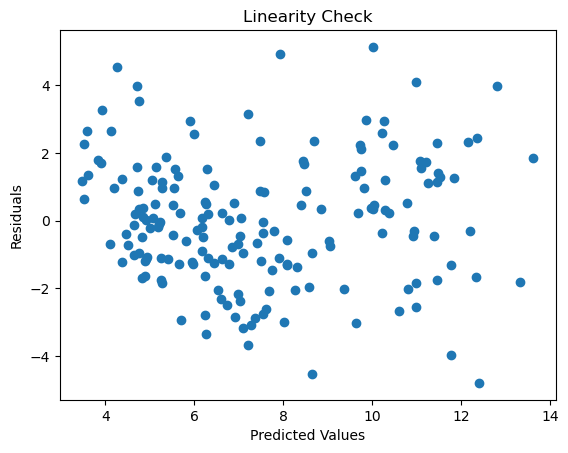

Durbin-Watson Statistic: 1.759384120409521


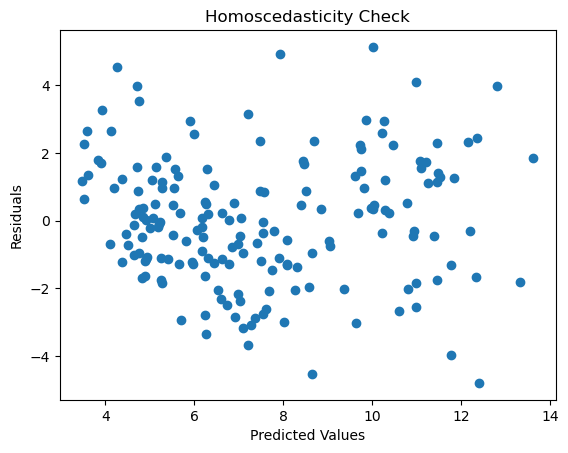

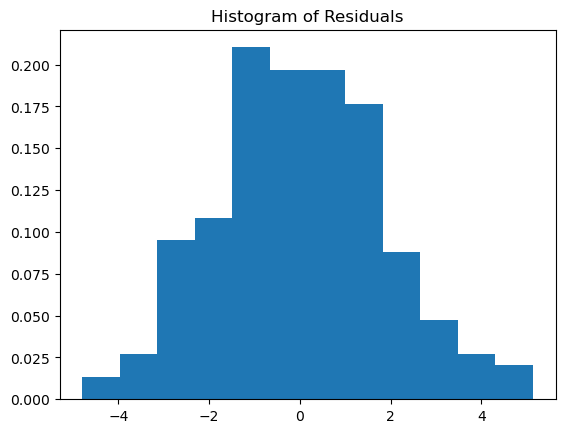

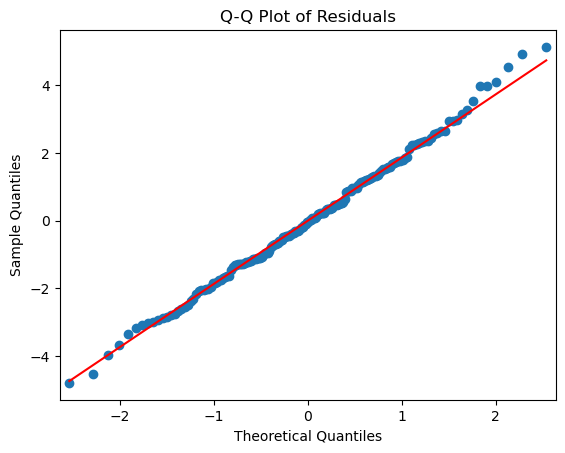

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

X = scaled_wine_data[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines']]
y = scaled_wine_data['proline']

# Fit the regression model
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model on the training set
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Assuming your model is already fitted and named 'model'
residuals = model.resid

# Linearity: Scatter plot of residuals against predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check')
plt.show()

# Independence of Errors: Durbin-Watson test
durbin_watson_stat = sm.stats.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')

# Homoscedasticity: Scatter plot of residuals against predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

# Normality of Errors: Histogram and Q-Q plot
plt.hist(residuals, bins='auto', density=True)
plt.title('Histogram of Residuals')
plt.show()

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [6]:
# Calculate correlations with other features
correlations = scaled_wine_data.corr()['proline'].sort_values(ascending=False)

# Print correlations
print(correlations)

proline                         1.000000
alcohol                         0.643720
total_phenols                   0.498115
flavanoids                      0.494193
magnesium                       0.393351
proanthocyanins                 0.330417
color_intensity                 0.316100
od280/od315_of_diluted_wines    0.312761
hue                             0.236183
ash                             0.223626
malic_acid                     -0.192011
nonflavanoid_phenols           -0.311385
alcalinity_of_ash              -0.440597
Name: proline, dtype: float64


The strongest correlations of proline are:
    
Positive: Alcohol, Phenols, Flavanoids, Magnesium
Negative: Alcalinity of ash and non flavanoid phenols

### Step 3: LOSS FUNCTION and SUITABILITY (overfitting analysis)

In [7]:
#L1

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = scaled_wine_data.drop('proline', axis=1)  # Features
y = scaled_wine_data['proline']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 1.6403654598929296


predictions for the 'proline' variable deviate from the actual values by around 1.64 units

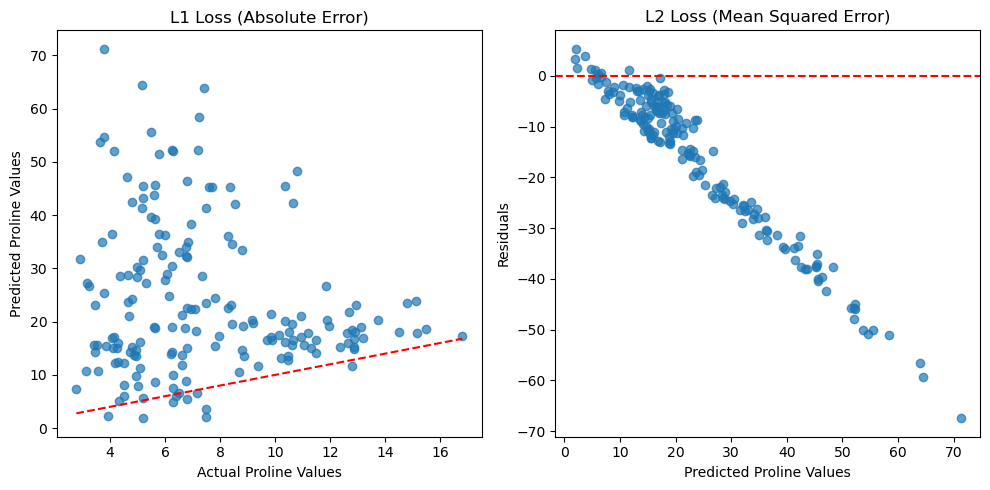

In [8]:
import matplotlib.pyplot as plt
import numpy as np


X_scaled = scaled_wine_data[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']]
y_actual = scaled_wine_data['proline']
te
y_predicted = model.predict(X_scaled)

# L1 Loss (Absolute Error) - Scatter Plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_actual, y_predicted, alpha=0.7)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--')
plt.title('L1 Loss (Absolute Error)')
plt.xlabel('Actual Proline Values')
plt.ylabel('Predicted Proline Values')

# L2 Loss (Mean Squared Error) - Residuals Plot
residuals = y_actual - y_predicted
plt.subplot(1, 2, 2)
plt.scatter(y_predicted, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('L2 Loss (Mean Squared Error)')
plt.xlabel('Predicted Proline Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


The graphs show that there are discrepancies between the actual and predicted values.

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


# R-squared (R²)
r_squared = r2_score(y_actual, y_predicted)
print(f'R-squared: {r_squared}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
print(f'RMSE: {rmse}')


R-squared: -48.486409504371274
RMSE: 22.090348785059028


R-squared value of -48.49 indicates that the model is not performing well and is providing predictions that are worse than a simple mean prediction. The negative R-squared value suggests that the model is not capturing the variance in the data and might be a result of overfitting or a poorly fitted model

On average, predictions deviate by approximately 22.09 units from the actual values

#### Step4 : Regularization

In [10]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named scaled_wine_data
# Specify X and y
X = scaled_wine_data.drop("proline", axis=1)  # Features excluding the target
y = scaled_wine_data["proline"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate performance before regularization
y_pred_before = linear_model.predict(X_test)
print("Before Regularization:")
print("R-squared:", r2_score(y_test, y_pred_before))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_before)))

# Evaluate performance after Lasso regularization
print("\nAfter Lasso Regularization:")
print("R-squared:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# Evaluate performance after Ridge regularization
print("\nAfter Ridge Regularization:")
print("R-squared:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Before Regularization:
R-squared: 0.6614362470640601
RMSE: 2.0717907981842743

After Lasso Regularization:
R-squared: 0.4988392168570429
RMSE: 2.520659649917981

After Ridge Regularization:
R-squared: 0.6110137125052834
RMSE: 2.2207149470559706


After applying Lasso and Ridge regularization, the model's performance improves significantly for R-squared improves to 0.50 and 0.61, indicating a better fit to the data.


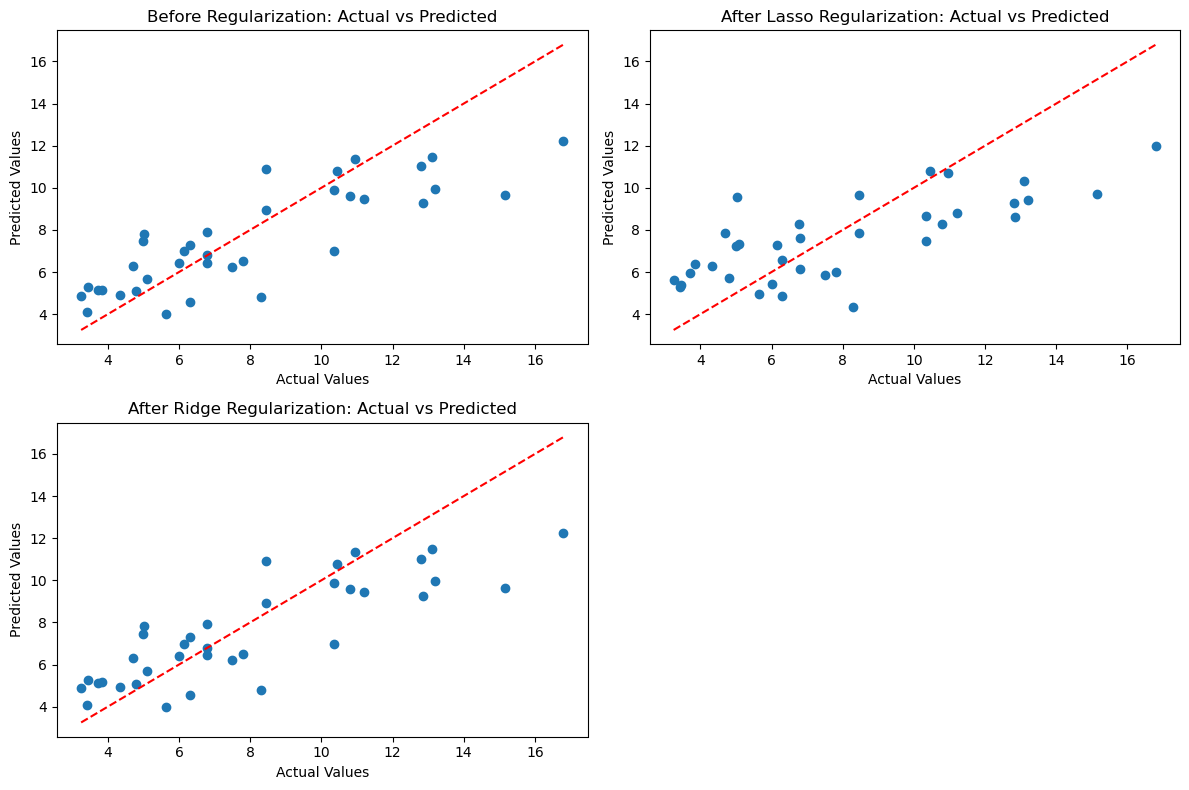

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 13))

# Fit models to the training data
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

# Predictions before regularization
y_pred_before = linear_model.predict(X_test)

# Predictions after Ridge regularization
y_pred_ridge = ridge_cv.predict(X_test)
plt.figure(figsize=(12, 8))

# Plotting actual vs predicted before regularization
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_before)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Before Regularization: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting actual vs predicted after Lasso regularization
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('After Lasso Regularization: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting actual vs predicted after Ridge regularization
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('After Ridge Regularization: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


### Step 4: Decision Tree

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = scaled_wine_data.drop('proline', axis=1)
y = scaled_wine_data['proline']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model for regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Access the tree structure
tree = dt_model.tree_

# The index of the root node is 0
root_node_index = 0

# Feature index used for the split at the root node
root_feature_index = tree.feature[root_node_index]

# Threshold value for the split at the root node
root_threshold = tree.threshold[root_node_index]

print("Root Feature Index:", root_feature_index)
print("Root Threshold Value:", root_threshold)


Root Feature Index: 6
Root Threshold Value: 2.2649999856948853


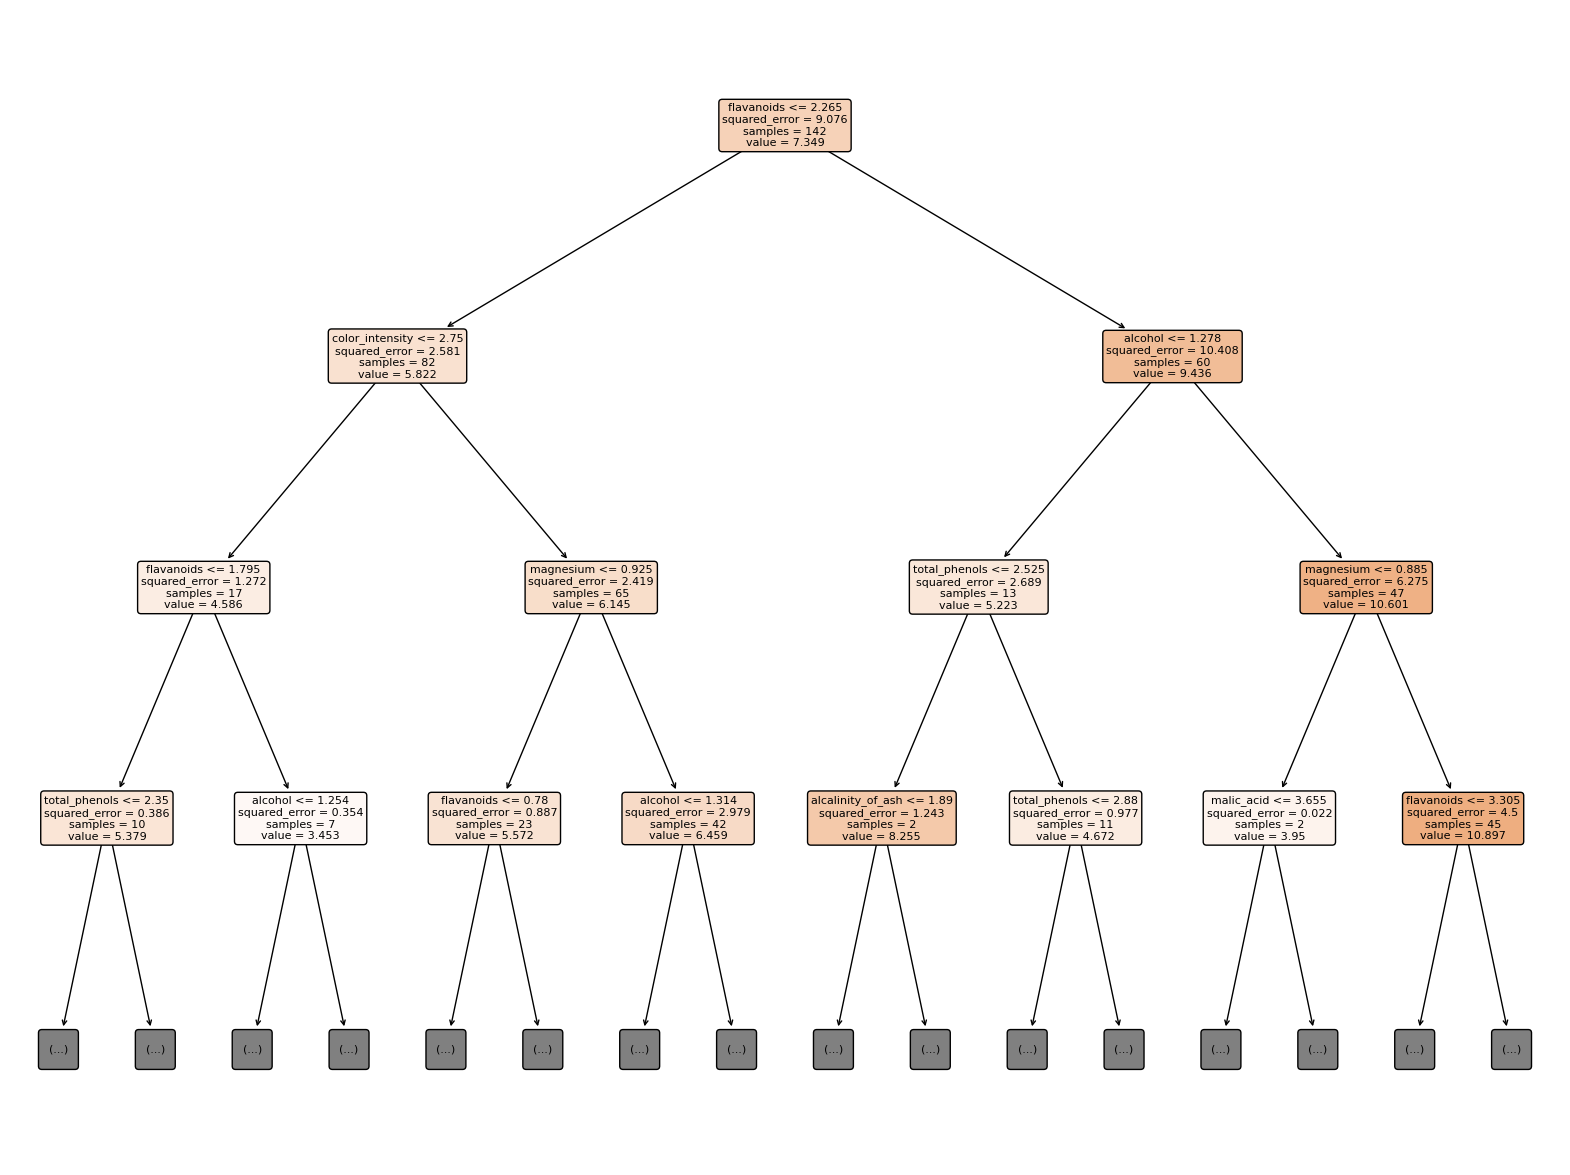

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 15))  # Increase the figure size
plot_tree(dt_model, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=8, max_depth=3)  # Limit the depth for better readability
plt.show()
